In [1]:
from init_plot import *

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-17 21:15:11.888174: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------func_help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    get_adata_umap
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



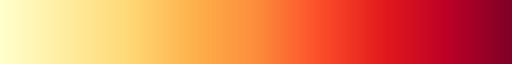

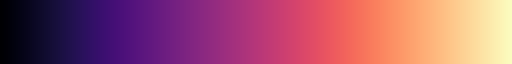

In [2]:
item = 'Mtb'

model = 'csMAHN'
if sys.argv[1] == 'True':
    model = sys.argv[2]
assert model in 'Seurat,came,csMAHN,SAMap'.split(
    ','), '[Error] Invalid modle "{}"'.format(model)

df_para = pd.read_csv(p_cache.joinpath(
    'parameter_{}.csv'.format(item)))
df_para['path_ref'] = df_para['path_ref'].apply(
    lambda x: p_cache.joinpath(x))
df_para['path_que'] = df_para['path_que'].apply(
    lambda x: p_cache.joinpath(x))

# cm = mpl.colormaps['magma']
# cm = mpl.colormaps['Reds']
cm = mpl.colormaps['YlOrRd']
cm_2 = mpl.colormaps['magma']
display(cm, cm_2)


def df_cumsum(df, keys, suffix='bottom'):
    for key in keys:
        # _plot['{}_{}'.format(key,suffix)] =  np.cumsum(_plot[key])
        df['{}_{}'.format(key, suffix)] = np.concatenate(
            (np.repeat(0, 1), np.cumsum(df[key])[:-1]))
    return df

# get res info

In [3]:
df = get_test_result_df(p_res)
df = df.query("tissue == '{}'".format(item))
df = df.loc[df['name'].str.extract(
    ';(\\d{6}-\\d{4})$', expand=False).fillna('').str.len() == 0, :]

_temp = df.apply(
    lambda row: '{tissue};{sp_ref}{sp_que};{name_que};{model}'.format(
        **row), axis=1)
assert _temp.is_unique, '[isnot unique]'
df.index = _temp
del _temp


df_para = pd.read_csv(p_cache.joinpath(
    'parameter_{}.csv'.format(item)
))
df_para['path_ref'] = df_para['path_ref'].apply(
    lambda x: p_cache.joinpath(x))
df_para['path_que'] = df_para['path_que'].apply(
    lambda x: p_cache.joinpath(x))
# display(df)
# for _i, _row in df.iterrows():
#     show_umap(_row)


[extract]
^(?P<tissue>.+)_(?P<sp_ref>.+)-corss-(?P<sp_que>.+);(?P<model>came|csMAHN|Seurat|SAMap);(?P<name_ref>[\w-]+)-map-(?P<name_que>[[\w-]+);?(?P<resdir_tag>.+)?$


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/pandas/core/strings/accessor.py:2738: FutureWarning: Possible nested set at position 127
  regex = re.compile(pat, flags=flags)


# pdf

## mh

In [4]:

with Block("ppara_plot_function_custom['subset_dict']"):
    def _func(data_dict, keys):
        return {_k: data_dict[_k]
                for _k in keys if _k in data_dict.keys()
                }
    ppara_plot_function_custom['subset_dict'] = _func
with Block("ppara_plot_function_custom['rgba_to_hex']"):
    def _func(rgba):
        r, g, b, a = rgba
        r_hex = hex(int(r * 255))[2:].zfill(2)
        g_hex = hex(int(g * 255))[2:].zfill(2)
        b_hex = hex(int(b * 255))[2:].zfill(2)
        return "#{}{}{}".format(r_hex, g_hex, b_hex)
    ppara_plot_function_custom['rgba_to_hex'] = _func

with Block("ppara_plot_function_custom['hbar']"):
    def _func(df_plot, color_map, ax):
        keys = [
            _.replace(
                '_bottom',
                '') for _ in df_plot.filter(
                regex='_bottom$').columns]
        for _i, _row in df_plot.iterrows():
            ax.barh(y=1+np.arange(len(keys)),
                    width=[_row[_k] for _k in keys],
                    height=.6,
                    left=[_row['{}_bottom'.format(_k)] for _k in keys],
                    color=color_map[_row.name],
                    alpha=.8,
                    label=_row.name)
        ax.tick_params('both', which='both', length=0, width=0)
        ax.set_xlim(0, 1)
        ax.set_xticks(np.linspace(0, 1, 6), ['{:.0f}%'.format(
            i*100) for i in np.linspace(0, 1, 6)], **fontdict_default)
        ax.set_yticks(
            1 +
            np.arange(
                len(keys)),
            keys,
            rotation=0,
            **fontdict_default)

    ppara_plot_function_custom['hbar'] = _func

with Block("ppara_plot_function_custom['heatmap']"):
    def _func(df_plot, ax, cmap=cm):
        sns.heatmap(df_plot,
                    square=True, cmap='Blues', cbar=False, ax=ax)
        _text = df_plot.index
        ax.set_yticks(
            np.arange(len(_text)) + .5, _text, **fontdict_default
        )
        _text = df_plot.columns
        ax.set_xticks(
            np.arange(len(_text)) + .5, _text, **fontdict_default
        )
        ax.set_ylabel(df_plot.index.name, fontdict=fontdict_axes_title)
        ax.set_xlabel(df_plot.columns.name, fontdict=fontdict_axes_title)

    ppara_plot_function_custom['heatmap'] = _func

with Block("ppara_plot_function_custom['umap_gene']"):
    def _func(
            df_plot, key_values, size=5,
            ax=None, cmap=mpl.colormaps['bwr'],
            key_uamp='UMAP1,UMAP2'.split(','),
            colorbar_loc=None,
            kw_pl_umap={}):
        if isinstance(key_values, str):
            key_values = [key_values]
        adata = sc.AnnData(obs=df_plot)
        adata.obsm['X_umap'] = adata.obs.loc[:, key_uamp].to_numpy()
        adata
        sc.pl.umap(adata, color=key_values,
                   # vmax=-2.5,vmin=2.5,
                   sort_order=True,
                   cmap=cmap,
                   size=size,
                   ax=ax,
                   colorbar_loc=colorbar_loc,
                   frameon=False, show=False, title='',
                   **kw_pl_umap)
    ppara_plot_function_custom['umap_gene'] = _func

del _func
print(*ppara_plot_function_custom.keys(), sep='\n')

heatmap_gene_get_marker_and_df_plot
heatmap_gene_process_multi_marker_and_df_plot
heatmap_gene
subset_dict
rgba_to_hex
hbar
heatmap
umap_gene


In [5]:
_row = df.loc['Mtb;mh;Mtb-h-macr;{}'.format(model), :]

with Block("ppara_adata_umap mh"):
    ppara_adata_umap.update({'mh': get_adata_umap(_row)})
    ppara_adata_umap['mh'].obs['sp'] = ppara_adata_umap['mh']\
        .obs['sp'].map(map_sp)

with Block("ppara_color_map sp_mh,sp_mma"):
    _temp = {_k: _c for _k, _c in zip('mouse,human,macaque'.split(
        ','), np.array(colors_article['5'][2])[[1, 0, 4],])}
    ppara_color_map.update(
        {'sp_mh': {_k: _temp[_k] for _k in 'mouse,human'.split(',')},
         'sp_mma': {_k: _temp[_k] for _k in 'mouse,macaque'.split(',')},
         })
with Block("ppara_color_map cell_type_all,cell_type"):
    # cell_type_all
    ppara_color_map['cell_type_all'] = get_color_map(
        np.sort(ppara_adata_umap['mh'].obs['preobs_sub_cell_type']
                .unique()), offset=6)
    ppara_color_map['cell_type_all'].update(
        {
            _k: _c for _k, _c in zip(
                'AM_1,AM_2,AM_3,AM_4'.split(','), [
                    ppara_plot_function_custom['rgba_to_hex'](
                        mpl.colormaps['Greens'](_)) for _ in np.linspace(
                        .2, .9, 4)])})
    ppara_color_map['cell_type_all'].update(
        {
            _k: _c for _k, _c in zip(
                'IM_1,IM_2,IM_3,IM_4'.split(','), [
                    ppara_plot_function_custom['rgba_to_hex'](
                        mpl.colormaps['Purples'](_)) for _ in np.linspace(
                        .2, .9, 4)])})

    # cell_type
    ppara_color_map['cell_type'] = {_k: ppara_color_map['cell_type_all'][_k]
                                    for _k in 'AM_1,AM_2,AM_3,AM_4,IM_1,IM_2,IM_3,IM_4'.split(',')}

# show_colors_article(ppara_adata_umap,'ppara_adata_umap')
# show_dict_key(ppara_color_map,'ppara_color_map')

In [6]:
with Block("adata_ref adata_que"):
    adata_ref = load_normalized_adata(
        find_path_from_para(
            df_para,
            _row['name_ref']),
        ppara_adata_umap['mh'].obs)
    adata_que = load_normalized_adata(
        find_path_from_para(
            df_para,
            _row['name_que']),
        ppara_adata_umap['mh'].obs)

with Block("ppara_map_marker"):
    ppara_data['marker_AM_IM'] = loads(p_plot.joinpath(
        'data/Mtb/violin_gene_mh.json').read_text())
    ppara_data['marker_h_IM'] =  {'que_IM':{
            # 'IM_1': 'MALT1,CD14,ZFP36,SLC7A11,IER3,PTGS2,JUN'
            'IM_1': 'KLF6,NFKBIA,RNF149'.split(','),
             # 'IM_2':'AIF1,MS4A7,APOE'
             'IM_2': 'CTSB,C1QB,C1QC,TGFBI'.split(',')
            }}

with Block("ppara_data DEG m h"):

    with Block("ppara_data['DEG_m']"):
        _temp = p_plot.joinpath('data/Mtb/DEG','DEG_{}_m_true_label.csv'.format(model))
        if _temp.exists():
            _data = pd.read_csv(_temp)\
            .query("pvals_adj <0.01 & logfoldchanges > 0")\
            .sort_values('group,logfoldchanges'.split(','),ascending=False)
        else:
            sc.tl.rank_genes_groups(
                    adata_ref,
                    groupby='true_label',
                    method='wilcoxon')
            _data = sc.get.rank_genes_groups_df(adata_ref,
                                                group=adata_ref.obs['true_label'].unique())
            _temp.parent.mkdir(exist_ok=True, parents=True)
            _data.to_csv(_temp,index=False)
    
        ppara_data['DEG_m'] = _data
    
    with Block("ppara_data['DEG_h_sub_cell_type']"):
        _temp = p_plot.joinpath('data/Mtb/DEG','DEG_{}_h_sub_cell_type.csv'.format(model))
        if _temp.exists():
            _data = pd.read_csv(_temp)\
            .query("pvals_adj <0.01 & logfoldchanges > 0")\
            .sort_values('group,logfoldchanges'.split(','),ascending=False)
        else:
            sc.tl.rank_genes_groups(
                    adata_que,
                    groupby='preobs_sub_cell_type',
                    method='wilcoxon')
            _data = sc.get.rank_genes_groups_df(adata_que, group=adata_que.obs['preobs_sub_cell_type'].unique())
            _temp.parent.mkdir(exist_ok=True, parents=True)
            _data.to_csv(_temp,index=False)
    
        ppara_data['DEG_h_sub_cell_type'] = _data
    
    with Block("ppara_data['DEG_h']"):
        _temp = p_plot.joinpath('data/Mtb/DEG','DEG_{}_h_pre_label.csv'.format(model))
        if _temp.exists():
            _data = pd.read_csv(_temp)\
            .query("pvals_adj <0.01 & logfoldchanges > 0")\
            .sort_values('group,logfoldchanges'.split(','),ascending=False)
        else:
            sc.tl.rank_genes_groups(
                    adata_que,
                    groupby='pre_label',
                    method='wilcoxon')
            _data = sc.get.rank_genes_groups_df(adata_que, group=adata_que.obs['pre_label'].unique())
            _temp.parent.mkdir(exist_ok=True, parents=True)
            _data.to_csv(_temp,index=False)
    
        ppara_data['DEG_h'] = _data

with Block("ppara_data['mh_sp']"):
    _data = pd.concat([
        group_agg(adata_ref.obs,'sp,true_label'.split(','),rename_dict={
            'true_label':'label',
            'true_label_count':'label_count'
        }),
        group_agg(adata_que.obs,'sp,pre_label'.split(','),rename_dict={
            'pre_label':'label',
            'pre_label_count':'label_count'
        }),
        group_agg(adata_que.obs,'sp,preobs_sub_cell_type'.split(','),rename_dict={
            'preobs_sub_cell_type':'label',
            'preobs_sub_cell_type_count':'label_count'
        }).assign(sp = 'human original label')
    ])
    _data = _data.merge(group_agg(_data,['sp'],{'label_count':['sum']}),on= 'sp')
    _data['ratio'] = _data.eval('label_count/label_count_sum')
    _data = _data.pivot(index='sp',columns = 'label',values='ratio')
    _data = _data.fillna(0)
    _data = _data.loc['human,human original label,mouse'.split(','),'IM_1,IM_2,IM_3,IM_4,AM_1,AM_2,AM_3,AM_4,AM_IM1,AM_MT,AI,AM_2_exclusive'.split(',')
    ].transpose()
    _data = df_cumsum(_data, _data.columns)
    ppara_data['mh_sp'] =  _data

with Block("ppara_data['mh_confusion_matrix']"):
    _data = group_agg(adata_que.obs,'preobs_sub_cell_type,pre_label'.split(','))\
        .pivot(index = 'preobs_sub_cell_type',columns='pre_label',
               values='pre_label_count')\
        .fillna(0)
    _data.index.name,_data.columns.name = 'original label','predict label'
    
    ppara_data['mh_confusion_matrix'] =  _data
    ppara_data['mh_confusion_matrix_zscore'] = stats.zscore(_data,axis=1)

display(ppara_data['mh_confusion_matrix'].transpose().style\
    .background_gradient(cmap=cm)\
    .format(precision=0))

original label,AI,AM_1,AM_2,AM_2_exclusive,AM_4,AM_IM1,AM_MT,IM_1
predict label,,,,,,,,
AM_1,273,2070,990,1,11,59,18,3
AM_2,93,5,932,29,1,1,4,4
AM_3,854,2904,785,0,3,19,19,1
AM_4,59,131,152,0,266,8,3,1
IM_1,19,0,74,6,0,25,0,19
IM_2,57,40,184,0,0,38,4,77
IM_3,26,3,6,0,0,8,0,1
IM_4,29,1,34,0,0,4,1,2


### plot

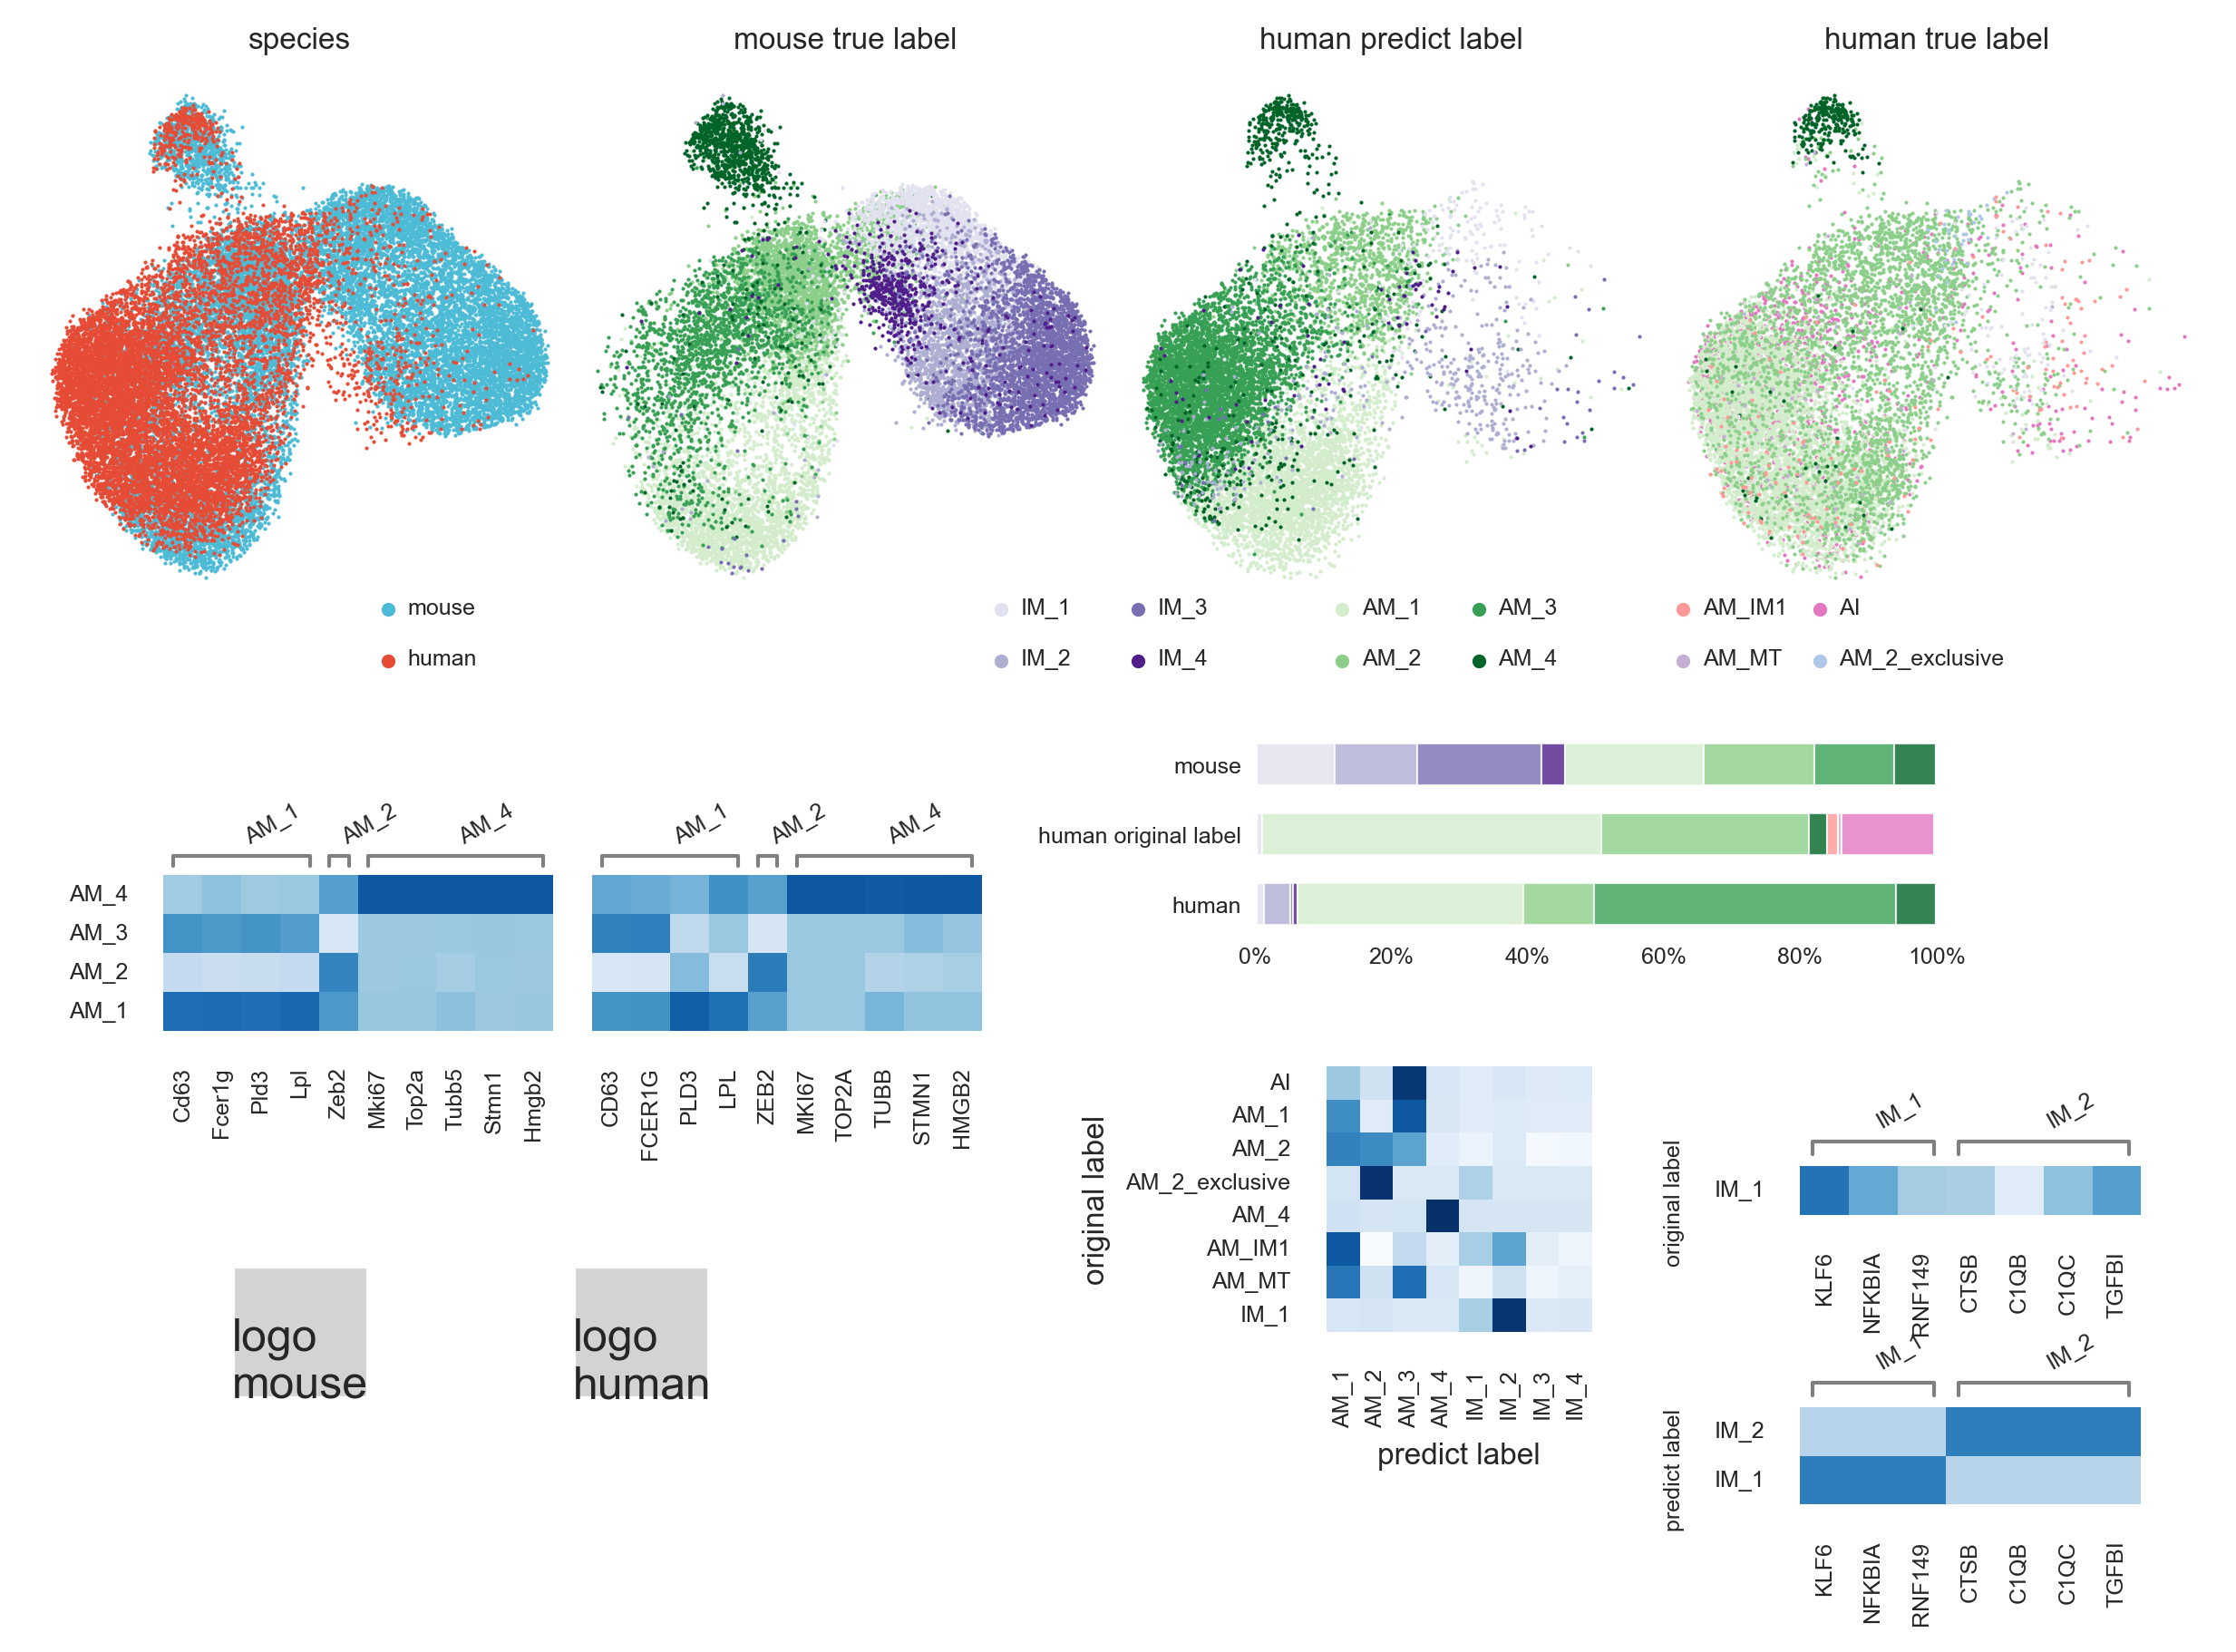

In [7]:
fig = plt.figure(figsize=(8.27, 11.69))
spec = fig.add_gridspec(nrows=46, ncols=32,
                        left=0.03, right=1,  # 设置边距
                        bottom=0.02, top=0.98,  # 设置边距
                        wspace=0, hspace=0)  # 设置子图间距
# UMAP ----------------------------------------
with Block("UMAP"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 0, 8, 8)
    plot_umap(ppara_adata_umap['mh'], 'sp', ppara_color_map['sp_mh'],
              size=1, ax=ax), ax.set_title('species')
    ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 0, 8, 8)
    plot_umap(subset_adata(ppara_adata_umap['mh'], 'dataset_type', 'ref'),
              'true_label', ppara_color_map['cell_type'],
              size=1, ax=ax), ax.set_title('mouse true label')
    ax = plt_pdf_add_ax_with_spec(fig, spec, 16, 0, 8, 8)
    plot_umap(subset_adata(ppara_adata_umap['mh'], 'dataset_type', 'que'),
              'pre_label', ppara_color_map['cell_type'],
              size=1, ax=ax), ax.set_title('human predict label')
    ax = plt_pdf_add_ax_with_spec(fig, spec, 24, 0, 8, 8)
    plot_umap(subset_adata(ppara_adata_umap['mh'], 'dataset_type', 'que'),
              'preobs_sub_cell_type', ppara_color_map['cell_type_all'],
              size=1, ax=ax), ax.set_title('human true label')
with Block("UMAP legend"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 5, 8, 1, 1)
    show_color_map(
        ppara_color_map['sp_mh'],
        fontdict=fontdict_default,
        ax=ax)
    ax.set_ymargin(.15)
    _temp = 'IM_1,IM_2,IM_3,IM_4,AM_1,AM_2,AM_3,AM_4,AM_IM1,AM_MT,AI,AM_2_exclusive'.split(
        ',')
    for i in range(6):
        ax = plt_pdf_add_ax_with_spec(fig, spec, 14+i*2+i//2, 8, 1, 1)
        show_color_map(ppara_plot_function_custom['subset_dict'](
            ppara_color_map['cell_type_all'], _temp[2*i:2*(i+1)]),
            fontdict=fontdict_default, ax=ax), ax.set_ymargin(.15)

# with Block("stacked violin"):
#     funcs_select_axes_marc = funcs_select_axes.copy()
#     funcs_select_axes_marc['1_box']=lambda fig,marker: [i for i in fig.get_axes()
#             if 'AM_1,AM_2,AM_3,AM_4'.split(',') == [
#             i1.get_text() for i1 in i.get_yticklabels()]
#          ]
#     ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 8, 10, 8)
#     sc_pl_show_genes(ppara_data['key_scpl_show_genes'],subset_adata(adata_que,'pre_label','AM_1,AM_2,AM_3,AM_4'.split(',')),
#                          ppara_map_marker['que'],'pre_label',ax=ax,
#                          funcs_select_axes=funcs_select_axes_marc,del_yticks=True)
#     ax = plt_pdf_add_ax_with_spec(fig, spec, 2, 8, 10, 8)
#     sc_pl_show_genes(ppara_data['key_scpl_show_genes'],subset_adata(adata_ref,'true_label','AM_1,AM_2,AM_3,AM_4'.split(',')),
#                          ppara_map_marker['ref'],'true_label',ax=ax,
#                         funcs_select_axes=funcs_select_axes_marc)

with Block("marker"):
    _temp = []
    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            subset_adata(adata_ref,'true_label',
                'AM_1,AM_2,AM_3,AM_4'.split(',')),'true_label',
            ppara_data['marker_AM_IM']['ref']))
    
    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            subset_adata(
                adata_que,
                'pre_label',
                'AM_1,AM_2,AM_3,AM_4'.split(',')),
            'pre_label',
            ppara_data['marker_AM_IM']['que']))
    
    
    df_marker, df_plot = ppara_plot_function_custom[
        'heatmap_gene_process_multi_marker_and_df_plot'](_temp)
    df_plot = df_plot.loc['AM_1,AM_2,AM_3,AM_4'.split(','), :]
    # fig, ax = mpl_subplots_get_fig_axs(ratio_nrows=4, ratio_ncols=8)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 2, 10, 12, 6)
    _fontdict = fontdict_default.copy()
    _fontdict.update({'rotation': 30,
                      'verticalalignment': 'bottom',
                      'horizontalalignment': 'left'})
    ppara_plot_function_custom['heatmap_gene'](
        df_plot,
        df_marker,
        ax,
        cmap='Blues',
        kv_line_text=_fontdict,
        cbar=False)

with Block("logo"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 3, 18, 2, 2)
    ax.text(0, 0, 'logo\nmouse', fontdict={'fontsize': 12})
    ax.set_facecolor('#D3D3D3'), ax.set_xticks(
        [], []), ax.set_yticks(
        [], [])
    ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 18, 2, 2)
    ax.text(0, 0, 'logo\nhuman', fontdict={'fontsize': 12})
    ax.set_facecolor('#D3D3D3'), ax.set_xticks(
        [], []), ax.set_yticks(
        [], [])

with Block("hbar"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 18, 10, 10, 3)
    ppara_plot_function_custom['hbar'](
        ppara_data['mh_sp'],
        ppara_color_map['cell_type_all'],
        ax
    )
with Block("heatmap confusion_matrix_zscore"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 19, 15, 4, 4)
    ppara_plot_function_custom['heatmap'](
        ppara_data['mh_confusion_matrix_zscore'], ax=ax, cmap='Blues'
    )

with Block("marker IMs"):
    _adata = subset_adata(adata_que, 'preobs_sub_cell_type', 'IM_1',
                          'pre_label', 'IM_1,IM_2'.split(','))
    with Block("original label"):
        _temp = []
        _temp.append(
            ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
                _adata,'preobs_sub_cell_type',
                ppara_data['marker_h_IM']['que_IM']))
        
        df_marker, df_plot = ppara_plot_function_custom[
            'heatmap_gene_process_multi_marker_and_df_plot'](_temp)
        ax = plt_pdf_add_ax_with_spec(fig, spec, 26, 14, 5, 5)
        _fontdict = fontdict_default.copy()
        _fontdict.update({'rotation': 30,
                          'verticalalignment': 'bottom',
                          'horizontalalignment': 'left'})
        ppara_plot_function_custom['heatmap_gene'](
            df_plot,df_marker,ax,cmap='Blues',
            kv_line_text=_fontdict,
            cbar=False,zscore=False)
        
        _fontdict = fontdict_default.copy()
        _fontdict.update({'rotation': 90,
                          'verticalalignment': 'bottom',
                          'horizontalalignment': 'left'})
        ax = plt_pdf_add_ax_with_spec(fig, spec, 24, 17)
        plt_pdf_add_text_with_ax(
            ax, 'original label', 0, 0, fontdict=_fontdict)
    
    with Block("predict label"):
        _temp = []
        _temp.append(
            ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
                _adata,'pre_label',
                ppara_data['marker_h_IM']['que_IM']))
        
        df_marker, df_plot = ppara_plot_function_custom[
            'heatmap_gene_process_multi_marker_and_df_plot'](_temp)
        ax = plt_pdf_add_ax_with_spec(fig, spec, 26, 18, 5, 5)
        _fontdict = fontdict_default.copy()
        _fontdict.update({'rotation': 30,
                          'verticalalignment': 'bottom',
                          'horizontalalignment': 'left'})
        ppara_plot_function_custom['heatmap_gene'](
            df_plot,df_marker,ax,cmap='Blues',
            kv_line_text=_fontdict,
            cbar=False,zscore=True)
        
        _fontdict = fontdict_default.copy()
        _fontdict.update({'rotation': 90,
                          'verticalalignment': 'bottom',
                          'horizontalalignment': 'left'})
        ax = plt_pdf_add_ax_with_spec(fig, spec, 24, 21)
        plt_pdf_add_text_with_ax(
            ax, 'predict label', 0, 0, fontdict=_fontdict)
# plt_pdf_add_grid_customer(fig)

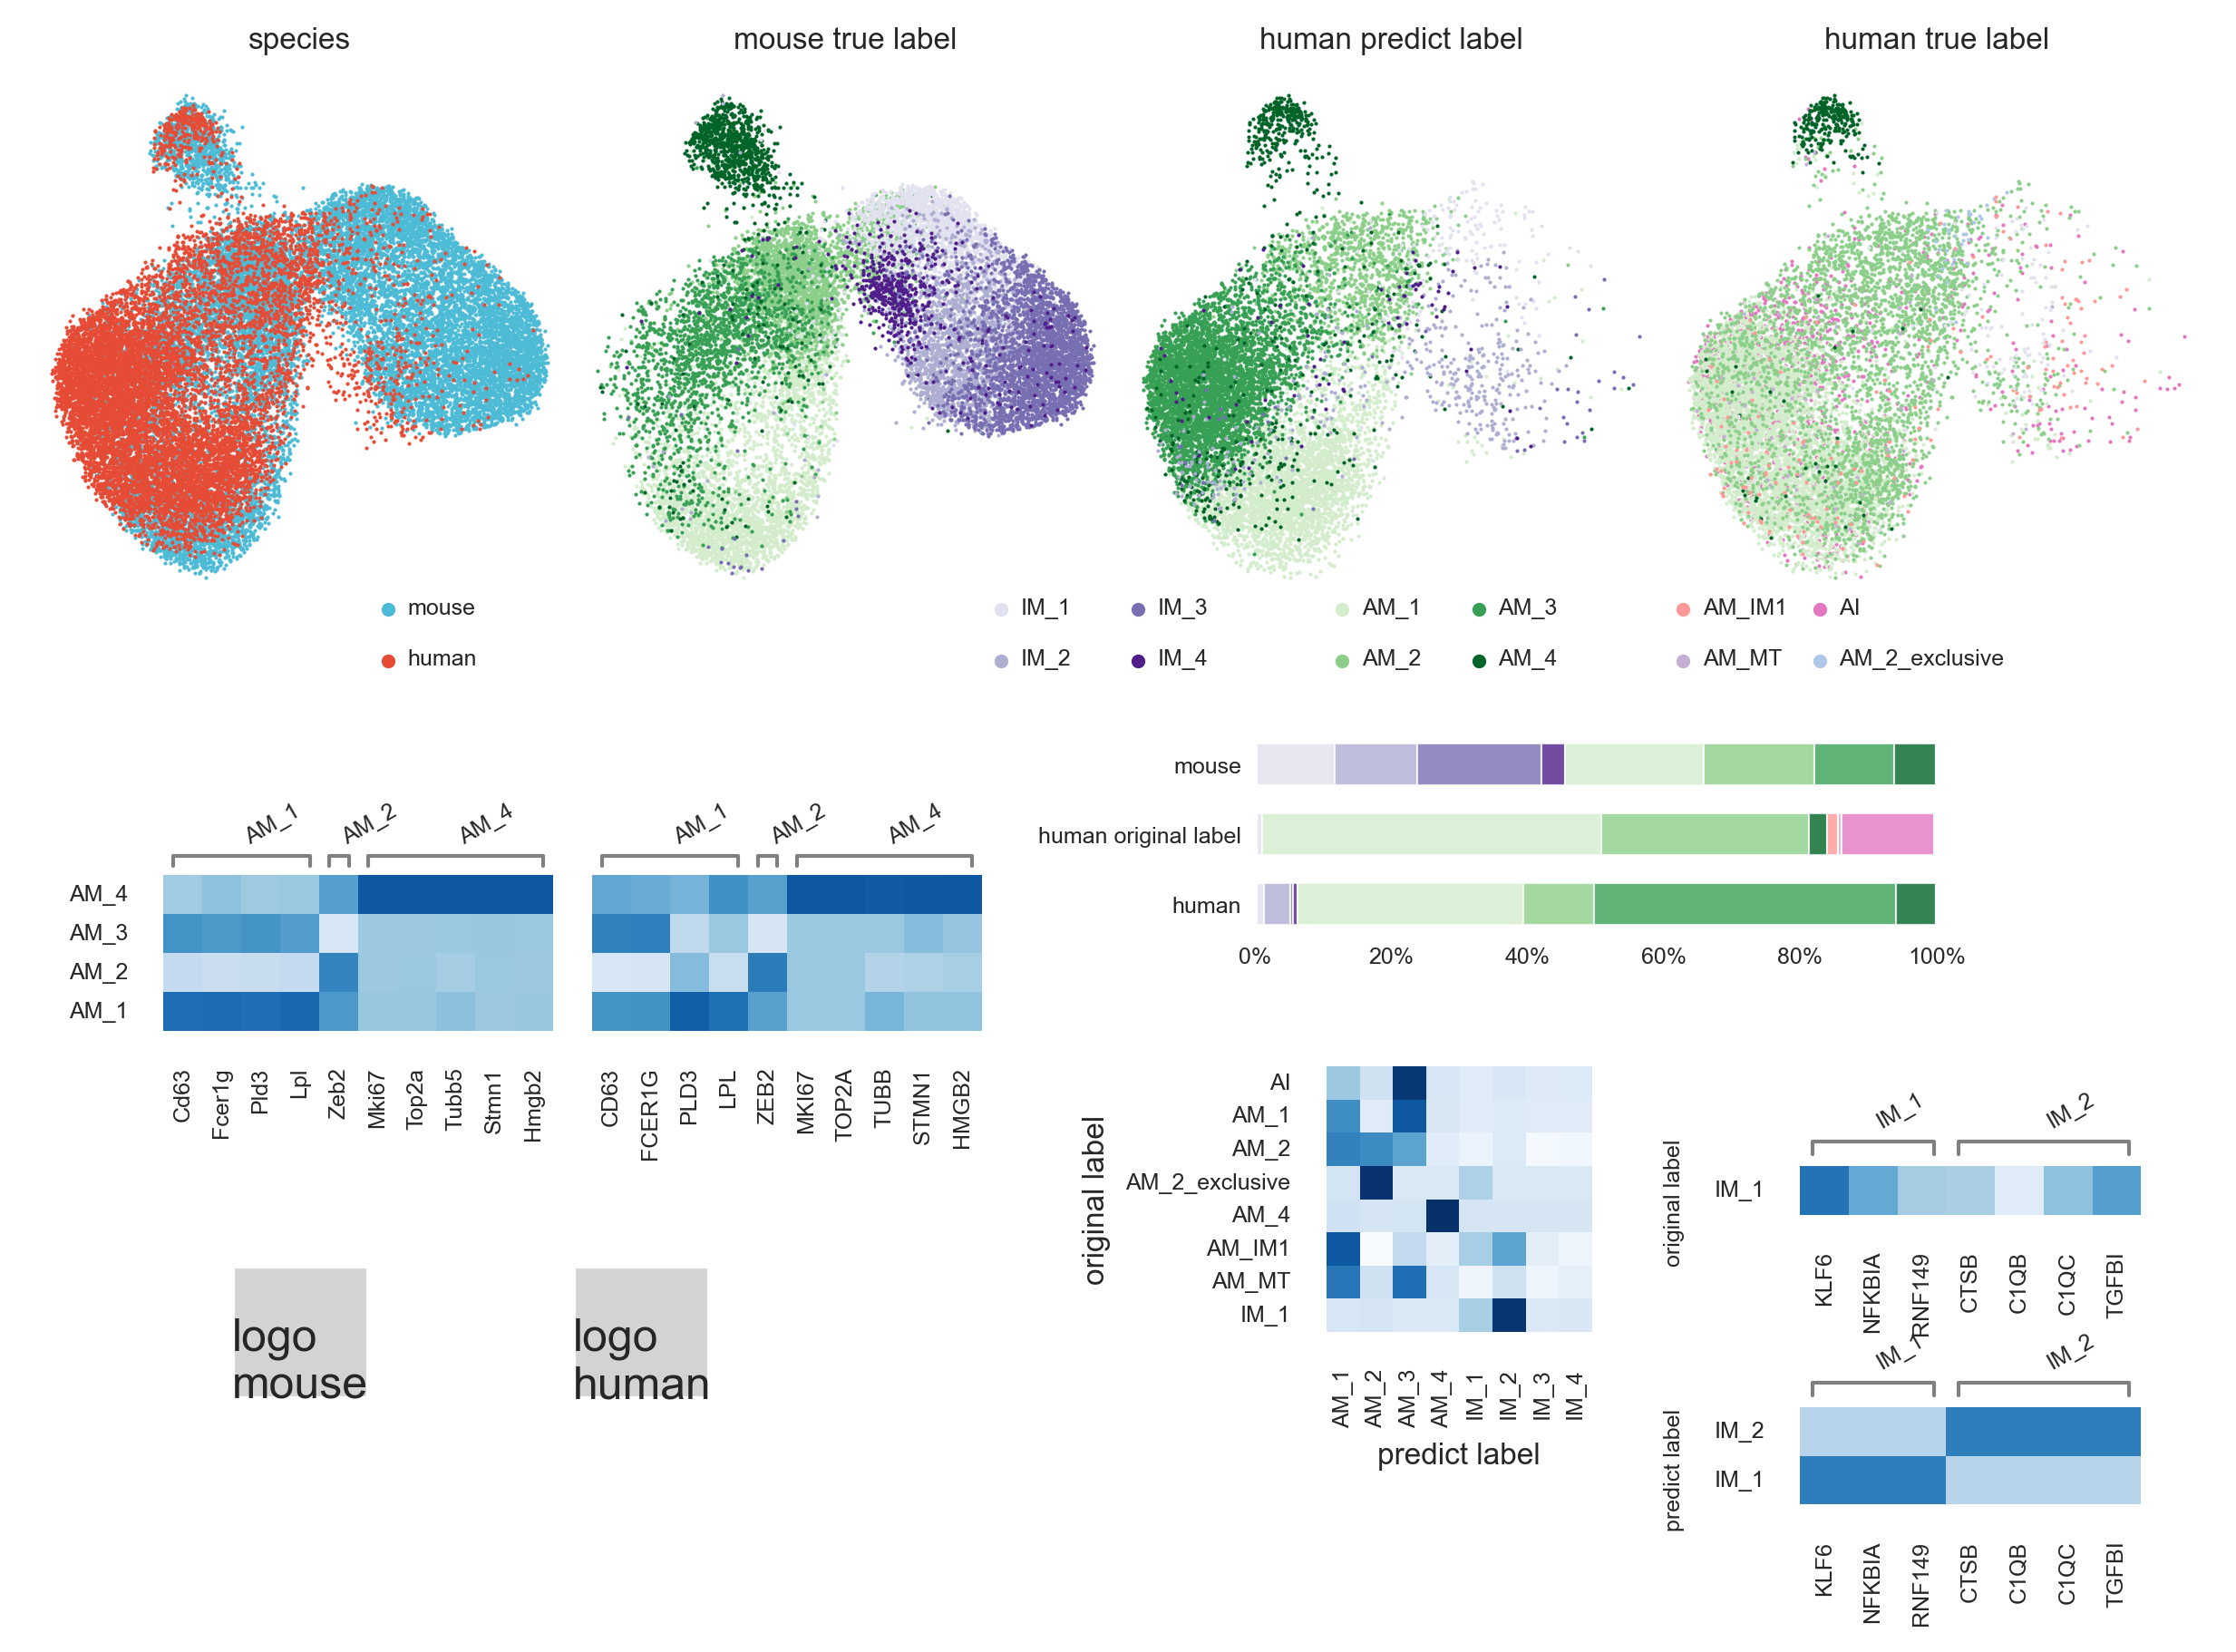

In [8]:
# if temp_del_ax:
#     fig.delaxes(ax)
# else:
#     temp_del_ax = True

display(fig)

In [9]:
display(adata_ref.obs.head(2))

,UMAP1,UMAP2,cell_type,dataset,is_right,max_prob,pre_label,true_label,dataset_type,sp,...,preobs_cell_id,preobs_cell_type,preobs_macr_cell_type,preobs_nCount_RNA,preobs_nFeature_RNA,preobs_orig.ident,preobs_seurat_clusters_article,preobs_sub_cell_type,preobs_umap_1,preobs_umap_2
Mtb_mtb;AAACCCACAGGCTATT_1,10.881107,0.836838,IM_3,Mtb_m,True,0.905931,IM_3,IM_3,ref,mouse,...,Mtb_mtb;AAACCCACAGGCTATT_1,macrophage,IM_3,9144,2176,Mtb_mtb;AAACCCACAGGCTATT_1,1,IM_3,6.774730,1.134033
Mtb_mtb;AAACCCAGTCCTACGG_1,5.798896,5.778219,IM_1,Mtb_m,True,0.787459,IM_1,IM_1,ref,mouse,...,Mtb_mtb;AAACCCAGTCCTACGG_1,macrophage,IM_1,1340,694,Mtb_mtb;AAACCCAGTCCTACGG_1,4,IM_1,1.706974,-2.713674


## mma

In [10]:
df.query("sp_que == 'ma' & model =='csMAHN' ")

,dir,name,tissue,sp_ref,sp_que,model,name_ref,name_que,resdir_tag
Mtb;mma;Mtb-ma-macr;csMAHN,/public/workspace/licanchengup/link/res_publis...,Mtb_m-corss-ma;csMAHN;Mtb-m-macr-map-Mtb-ma-ma...,Mtb,m,ma,csMAHN,Mtb-m-macr,Mtb-ma-macr,epochs=500;is_1v1=False
Mtb;mma;COVID-ma-macr;csMAHN,/public/workspace/licanchengup/link/res_publis...,Mtb_m-corss-ma;csMAHN;Mtb-m-macr-map-COVID-ma-...,Mtb,m,ma,csMAHN,Mtb-m-macr,COVID-ma-macr,epochs=500;is_1v1=False
Mtb;mma;COVID-ma-macr-time-choice;csMAHN,/public/workspace/licanchengup/link/res_publis...,Mtb_m-corss-ma;csMAHN;Mtb-m-macr-map-COVID-ma-...,Mtb,m,ma,csMAHN,Mtb-m-macr,COVID-ma-macr-time-choice,epochs=500;is_1v1=False


In [11]:
for _ in """Mtb;mma;Mtb-ma-macr;{}
Mtb;mma;COVID-ma-macr-time-choice;{}""".split('\n'):
    _row = df.loc[_.format(model), :]
    _data = get_adata_umap(_row, False)
    _data.obs['sp'] = _data.obs['sp'].map(map_sp)
    ppara_adata_umap['{}{}_{}'.format(_row['sp_ref'], _row['sp_que'],
                                      _row['name_que'].split('-')[0])] = _data

ppara_adata_umap['mma_COVID'].obs['preobs_ma_id'] = ppara_adata_umap['mma_COVID']\
    .obs['preobs_ma_id'].astype(str)\
    .str.extract('(\\d+)\\.', expand=False)

ppara_color_map.update(
    {'ma_status': get_colors_article('healthy,Mtb,COVID19'.split(','), 0)})

print('\n>ppara_adata_umap-------------------------',
      *ppara_adata_umap.keys(), sep='\n')
print('\n>ppara_color_map-------------------------',
      *ppara_color_map.keys(), sep='\n')


>ppara_adata_umap-------------------------
mh
mma_Mtb
mma_COVID

>ppara_color_map-------------------------
sp_mh
sp_mma
cell_type_all
cell_type
ma_status


In [12]:
with Block("ppara_data['mma_Mtb_pre_lable_ratio']"):
    _data = subset_adata(
        ppara_adata_umap['mma_Mtb'],
        'dataset_type',
        'que').obs
    _data = _data.loc[:, ~_data.isna().all()]
    # print(*_data.columns,sep='\n')
    _data = _data.loc[:, 'pre_label,preobs_treatment'.split(',')].copy()
    _data['type'] = _data['pre_label'].str.extract(
        "^([AI]M)_\\d+", expand=False)
    _data['ma_id'] = _data['preobs_treatment'].apply(
        lambda x: 'anti-{}'.format(x))
    _data = pd.merge(
        group_agg(
            _data,
            'ma_id,type,pre_label'.split(',')),
        group_agg(
            _data,
            'ma_id,type'.split(',')),
        on='ma_id,type'.split(','))
    ppara_data['mma_Mtb_pre_lable_count'] = _data.pivot(
        index='pre_label', columns='ma_id', values='pre_label_count').fillna(0)
    _data['ratio'] = _data.eval('pre_label_count/type_count')
    _data = _data.pivot(
        index='pre_label',
        columns='ma_id',
        values='ratio').fillna(0)

    ppara_data['mma_Mtb_pre_lable_ratio'] = _data

with Block("ppara_data['mma_COVID19_pre_lable_ratio']"):
    _data = subset_adata(
        ppara_adata_umap['mma_COVID'],
        'dataset_type',
        'que').obs
    _data = _data.loc[:, ~_data.isna().all()]
    _data = _data.loc[:, 'pre_label,preobs__batch,\
preobs_ma_id,preobs_time_mask,preobs_status'.split(',')].copy()
    _data['ma_id'] = df_apply_merge_field(
        _data, '{preobs_status} {preobs_time_mask}')
    _data['type'] = _data['pre_label'].str.extract(
        "^([AI]M)_\\d+", expand=False)
    _data = pd.merge(
        group_agg(
            _data,
            'ma_id,type,pre_label'.split(',')),
        group_agg(
            _data,
            'ma_id,type'.split(',')),
        on='ma_id,type'.split(','))
    ppara_data['mma_COVID19_pre_lable_count'] = _data.pivot(
        index='pre_label', columns='ma_id', values='pre_label_count').fillna(0)
    _data['ratio'] = _data.eval('pre_label_count/type_count')

    _data = _data.pivot(
        index='pre_label',
        columns='ma_id',
        values='ratio').fillna(0)

    ppara_data['mma_COVID19_pre_lable_ratio'] = _data

with Block("ppara_data['mma_Mtb_COVID19_pre_lable_ratio']"):

    _data = pd.concat([ppara_data['mma_Mtb_pre_lable_ratio'],
                       ppara_data['mma_COVID19_pre_lable_ratio']],
                      axis=1).fillna(0)
    _data = _data.loc['IM_1,IM_2,IM_3,IM_4,AM_1,AM_2,AM_3,AM_4'.split(
        ','), 'death d14-17,infected d3,anti-CD8b,anti-CD8a,anti-IgG,healthy d-7'.split(',')]
    _data = _data.rename(columns=lambda x: x.replace('anti', 'death anti'))
    _data.columns = [' '.join(_.split(' ')[::-1]) for _ in _data.columns]
    _data = pd.concat([
        df_cumsum(_data.filter(regex='AM_', axis=0).copy(), _data.columns),
        df_cumsum(_data.filter(regex='IM_', axis=0).copy(), _data.columns)])
    ppara_data['mma_Mtb_COVID19_pre_lable_ratio'] = _data

    _data = pd.concat([ppara_data['mma_Mtb_pre_lable_count'],
                       ppara_data['mma_COVID19_pre_lable_count']],
                      axis=1).fillna(0)
    _data = _data.loc['IM_1,IM_2,IM_3,IM_4,AM_1,AM_2,AM_3,AM_4'.split(
        ','), 'death d14-17,infected d3,anti-CD8b,anti-CD8a,anti-IgG,healthy d-7'.split(',')]
    _data = _data.rename(columns=lambda x: x.replace('anti', 'death anti'))
    _data.columns = [' '.join(_.split(' ')[::-1]) for _ in _data.columns]
    ppara_data['mma_Mtb_COVID19_pre_lable_count'] = _data

show_dict_key(ppara_data, 'ppara_data')


>ppara_data['']-----------------------------------------------------------
	DEG_h
	DEG_h_sub_cell_type
	DEG_m
	key_scpl_show_genes
	marker_AM_IM
	marker_h_IM
	mh_confusion_matrix
	mh_confusion_matrix_zscore
	mh_sp
	mma_COVID19_pre_lable_count
	mma_COVID19_pre_lable_ratio
	mma_Mtb_COVID19_pre_lable_count
	mma_Mtb_COVID19_pre_lable_ratio
	mma_Mtb_pre_lable_count
	mma_Mtb_pre_lable_ratio


### plot

In [13]:
# # UMAP ----------------------------------------
# with mpl.rc_context({'axes.facecolor': 'white',
#                      'axes.edgecolor': 'grey'}):
#     with Block('Mtb'):
#         ax = plt_pdf_add_ax_with_spec(fig, spec, 3, 22, 5, 5)
#         plot_umap(ppara_adata_umap['mma_Mtb'], 'sp', ppara_color_map['sp_mma'],
#                   size=1, ax=ax), ax.set_title('species')
#         ax.set_axis_on(), ax.set_yticks([], []), ax.set_xticks([], [])
#         ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 22, 5, 5)
#         plot_umap(subset_adata(ppara_adata_umap['mma_Mtb'], 'dataset_type', 'ref'),
#                   'true_label', ppara_color_map['cell_type'],
#                   size=1, ax=ax), ax.set_title('mouse true label')
#         ax.set_axis_on(), ax.set_yticks([], []), ax.set_xticks([], [])
#         ax = plt_pdf_add_ax_with_spec(fig, spec, 13, 22, 5, 5)
#         plot_umap(subset_adata(ppara_adata_umap['mma_Mtb'], 'dataset_type', 'que'),
#                   'pre_label', ppara_color_map['cell_type'],
#                   size=1, ax=ax), ax.set_title('macaque predict label')
#         ax.set_axis_on(), ax.set_yticks([], []), ax.set_xticks([], [])
#     with Block('COVID'):
#         ax = plt_pdf_add_ax_with_spec(fig, spec, 3, 27, 5, 5)
#         plot_umap(ppara_adata_umap['mma_COVID'], 'sp', ppara_color_map['sp_mma'],
#                   size=1, ax=ax)
#         ax.set_axis_on(), ax.set_yticks([], []), ax.set_xticks([], [])
#         ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 27, 5, 5)
#         plot_umap(subset_adata(ppara_adata_umap['mma_COVID'], 'dataset_type', 'ref'),
#                   'true_label', ppara_color_map['cell_type'],
#                   size=1, ax=ax)
#         ax.set_axis_on(), ax.set_yticks([], []), ax.set_xticks([], [])
#         ax = plt_pdf_add_ax_with_spec(fig, spec, 13, 27, 5, 5)
#         plot_umap(subset_adata(ppara_adata_umap['mma_COVID'], 'dataset_type', 'que'),
#                   'pre_label', ppara_color_map['cell_type'],
#                   size=3, ax=ax)
#         ax.set_axis_on(), ax.set_yticks([], []), ax.set_xticks([], [])

# with Block('logo'):
#     ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 23, 2, 2)
#     ax.text(0, 0, 'logo\nMtb', fontdict={'fontsize': 12})
#     ax.set_facecolor('#D3D3D3'), ax.set_xticks([], []), ax.set_yticks([], [])
#     ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 29, 2, 2)
#     ax.text(0, 0, 'logo\nCOVID', fontdict={'fontsize': 12})
# ax.set_facecolor('#D3D3D3'), ax.set_xticks([], []), ax.set_yticks([],
# [])

# with Block('hbar AM'):
#     ax = plt_pdf_add_ax_with_spec(fig, spec, 6, 34, 9, 6)
#     ppara_plot_function_custom['hbar'](
#         ppara_data['mma_Mtb_COVID19_pre_lable_ratio'].filter(regex='AM_',axis=0),
#         ppara_color_map['cell_type_all'],
#         ax
#     )

#     with Block('text'):
#         ax = plt_pdf_add_ax_with_spec(fig,spec,2,34,1,6)
#         ax.set_xlim(0,10),ax.set_ylim(0,60)
#         ax.set_xticks([],[]),ax.set_yticks([],[])
#         # ax.set_xticks([0,5,10],'0,5,10'.split(','),**fontdict_default)
#         # ax.set_yticks([i*10 for i in range(5+1)],[str(i*10) for i in range(5+1)],
#         #              **fontdict_default)
#         ax.vlines(x=8,ymax=45,ymin=22,linewidths=.5,colors='grey')
#         ax.vlines(x=8,ymax=17,ymin=3,linewidths=.5,colors='grey')
#         _fontdict =  fontdict_default.copy()
#         _fontdict.update({'rotation':90,'horizontalalignment':'center'})
#         ax.text(4,27,'Mtb\ninfected',fontdict=_fontdict)
#         ax.text(4,2.5,'COVID-19\ninfected',fontdict=_fontdict)

# with Block('hbar IM'):
#     ax = plt_pdf_add_ax_with_spec(fig, spec, 21, 34, 9, 6)
#     ppara_plot_function_custom['hbar'](
#         ppara_data['mma_Mtb_COVID19_pre_lable_ratio'].filter(regex='IM_',axis=0),
#         ppara_color_map['cell_type_all'],
#         ax
#     )

#     with Block('text'):
#         ax = plt_pdf_add_ax_with_spec(fig,spec,17,34,1,6)
#         ax.set_xlim(0,10),ax.set_ylim(0,60)
#         ax.set_xticks([],[]),ax.set_yticks([],[])
#         # ax.set_xticks([0,5,10],'0,5,10'.split(','),**fontdict_default)
#         # ax.set_yticks([i*10 for i in range(5+1)],[str(i*10) for i in range(5+1)],
#         #              **fontdict_default)
#         ax.vlines(x=8,ymax=45,ymin=22,linewidths=.5,colors='grey')
#         ax.vlines(x=8,ymax=17,ymin=3,linewidths=.5,colors='grey')
#         _fontdict =  fontdict_default.copy()
#         _fontdict.update({'rotation':90,'horizontalalignment':'center'})
#         ax.text(4,27,'Mtb\ninfected',fontdict=_fontdict)
#         ax.text(4,2.5,'COVID-19\ninfected',fontdict=_fontdict)

# save

In [14]:
with Block('text'):
    for _text, _x, _y in zip(
        'a,b,c,d,e'.split(','),
        [int(_) for _ in '1,1,15,15,24'.split(',')],
            [int(_) for _ in '0,10,10,15,15'.split(',')]):
        plt_pdf_add_text_with_ax(
            plt_pdf_add_ax_with_spec(
                fig, spec, _x, _y), _text)

with Block('note'):
    _text = """(a) The UMAP plot of embeddings outputted by macrophage for human and mouse 
bronchoalveolar lavage, applied with csMAHN. (b) gene expression marker of each 
subclusters. (c) proportion of each macrophage subtype in mouse and human. 
(d) heatmap of confusion matrix for csMHAN prediction labels and original labels
in human cells. (e) gene expression marker of IM_1 and IM_2 in human cells"""
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 45, 42)
    plt_pdf_add_text_with_ax(ax, _text, 0, 0)


# with PdfPages('ouput.pdf') as pdf:
with PdfPages(p_pdf.joinpath('{}_{}_1.pdf'.format(item, model))) as pdf:
    # save ----------------------------------------
    pdf.savefig(fig)
    plt.close('all')
plt_pdf_add_grid_customer(fig)
temp_del_ax = False

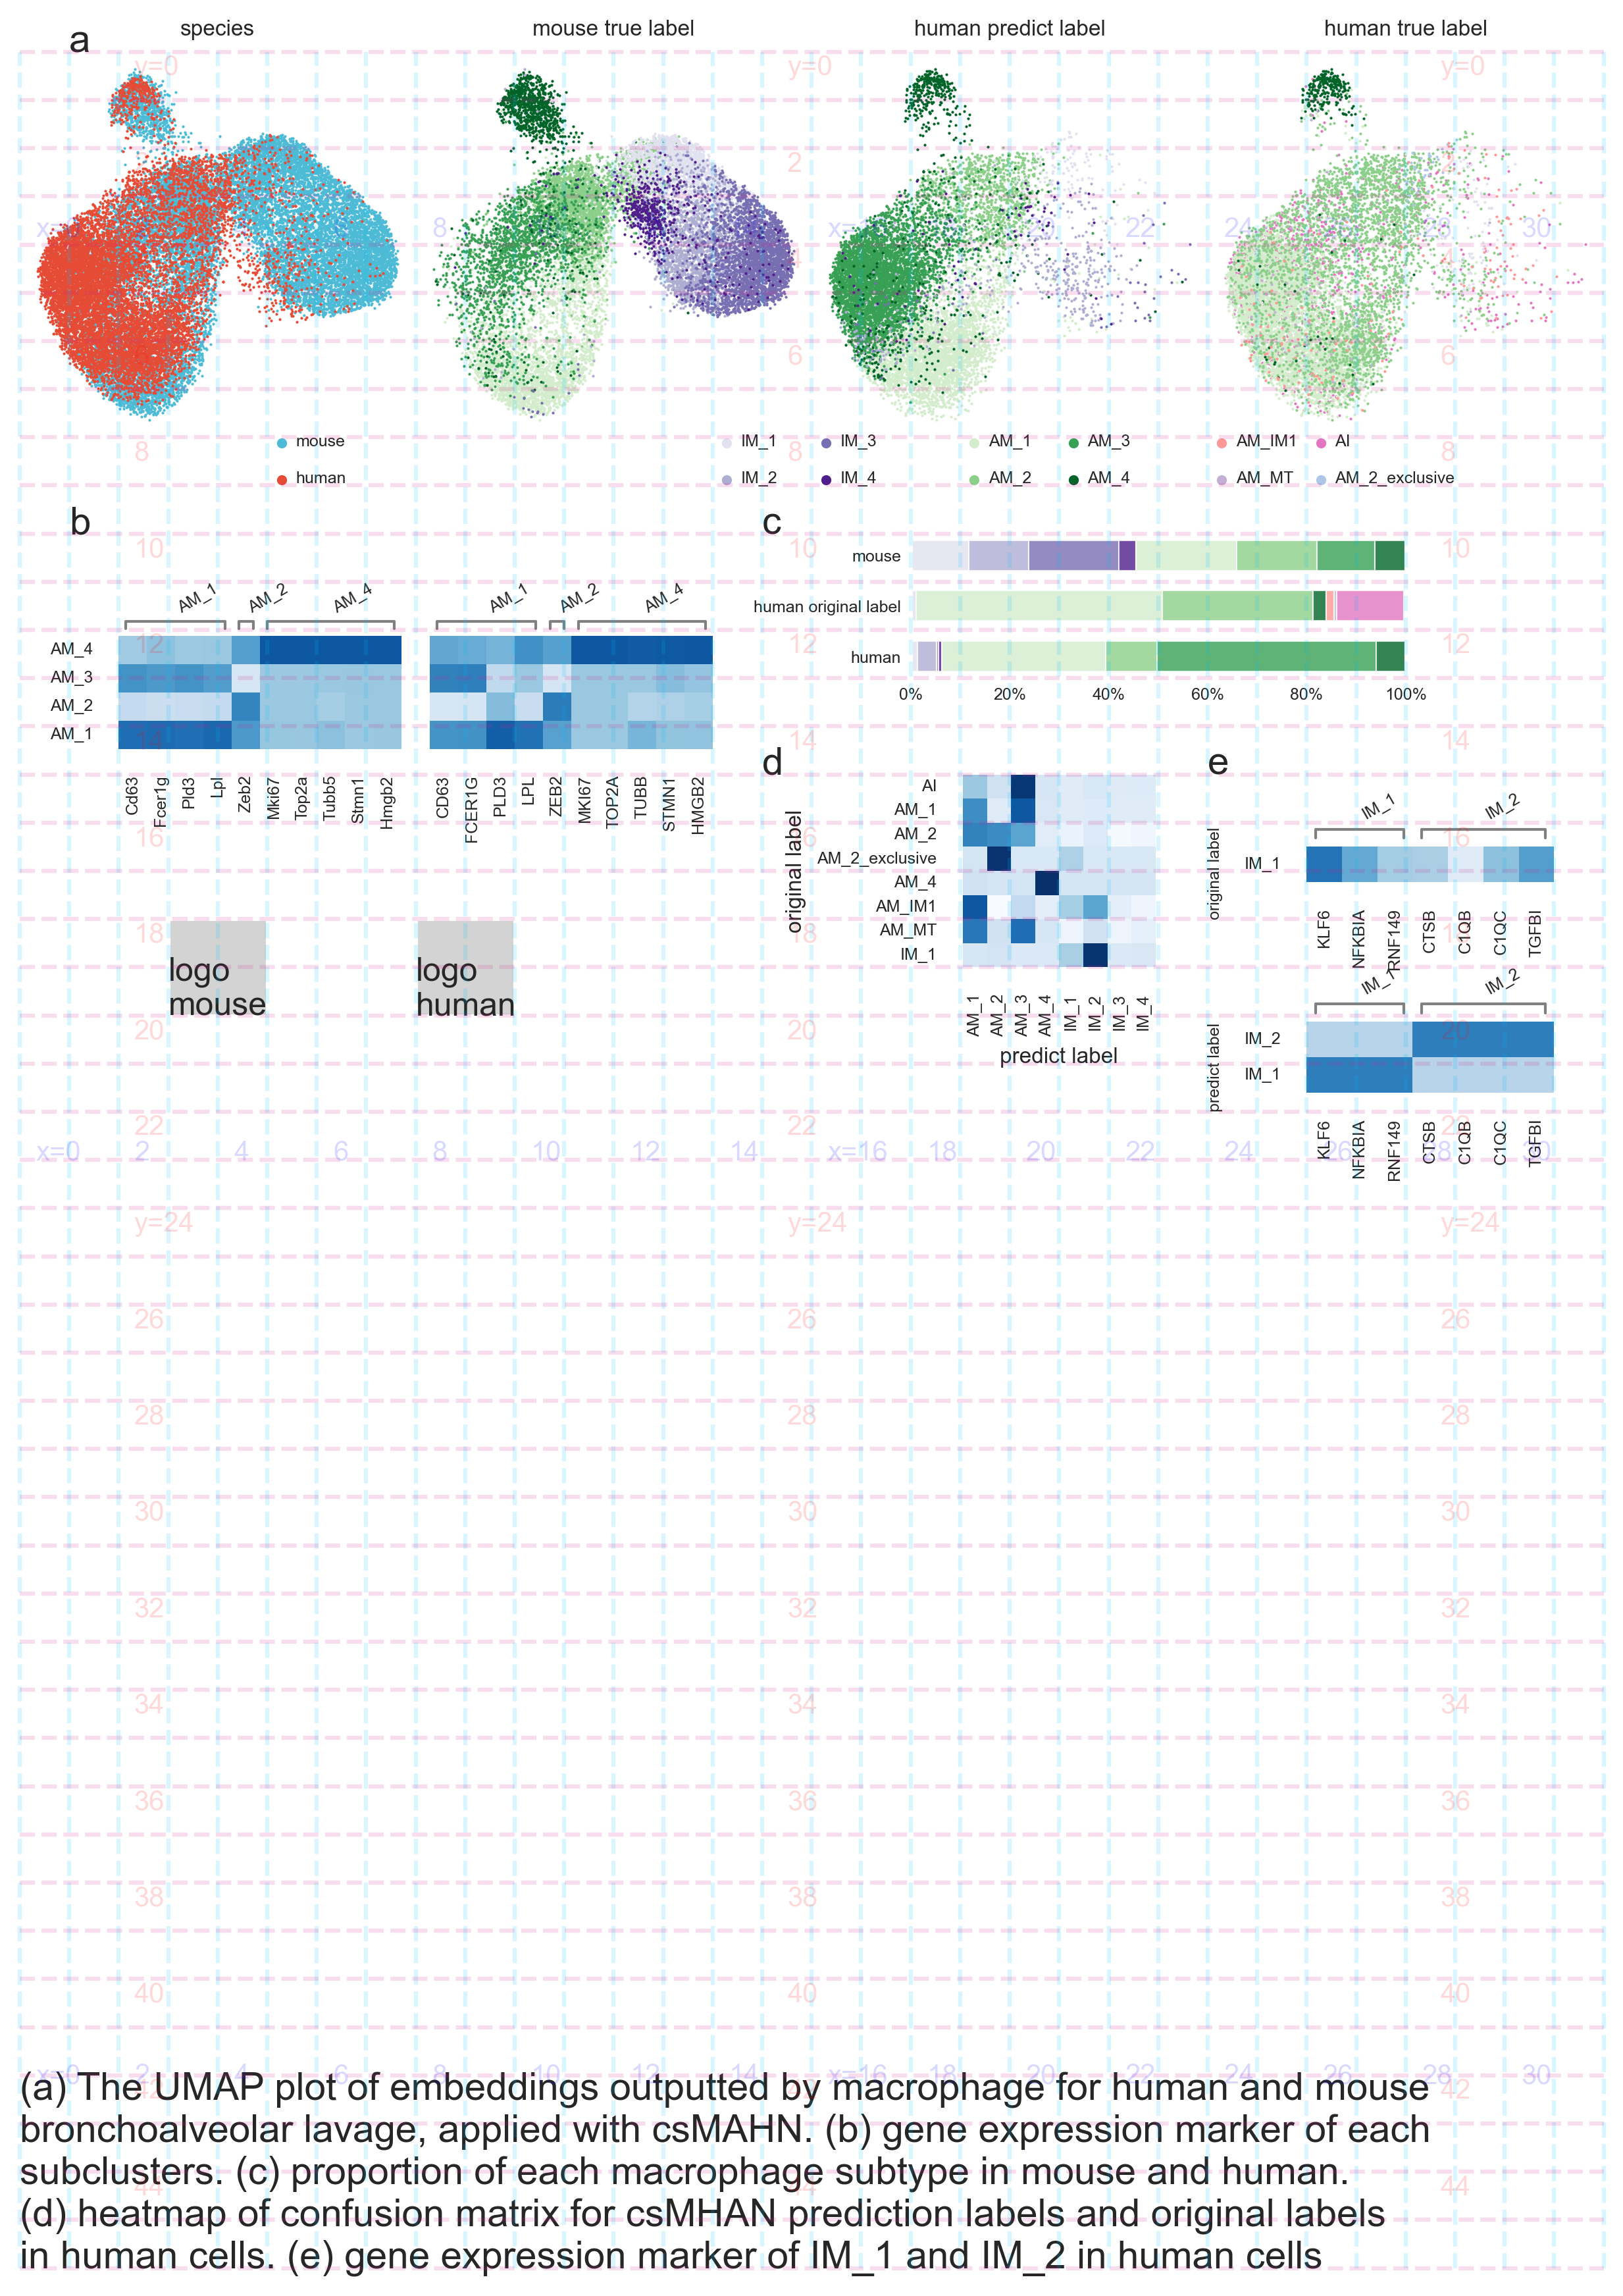

In [15]:
if temp_del_ax:
    fig.delaxes(ax)
else:
    temp_del_ax = True

display(fig)

# finish

In [16]:
print("\n[finish]\n".center(100, "-"))

---------------------------------------------
[finish]
---------------------------------------------


# draft

In [17]:
with Block("ppara_data exp m,h"):
    _row = df.loc['Mtb;mh;Mtb-h-macr;{}'.format(model), :]

    _data = load_normalized_adata(
        find_path_from_para(
            df_para,
            _row['name_ref']),
        ppara_adata_umap['mh'].obs)
    ppara_data['exp_m'] = sc.get.obs_df(
        _data,
        'UMAP1,UMAP2,cell_type,dataset,is_right,max_prob'.split(',') +
        'pre_label,true_label,dataset_type,sp'.split(',') +
        'Siglecf,Itgam,Itgax'.split(','))

    _data = load_normalized_adata(
        find_path_from_para(
            df_para,
            _row['name_que']),
        ppara_adata_umap['mh'].obs)
    ppara_data['exp_h'] = sc.get.obs_df(
        _data,
        'UMAP1,UMAP2,cell_type,dataset,is_right,max_prob'.split(',') +
        'pre_label,true_label,dataset_type,sp'.split(',') +
        'SIGLEC6,CD33,ITGAM,ITGAX'.split(','))

with Block("ppara_data exp ma_Mtb,Ma_COVID"):
    for _ in """Mtb;mma;Mtb-ma-macr;{},\
Mtb;mma;COVID-ma-macr-time-choice;{}""".split(','):
        _row = df.loc[_.format(model), :]
        _adata = load_normalized_adata(find_path_from_para(df_para,
                                                           _row['name_que']),
                                       ppara_adata_umap['{}{}_{}'.format(_row['sp_ref'],
                                                                         _row['sp_que'],
                                                                         _row['name_que'].split('-')[0])].obs)
        ppara_data['exp_{}_{}'.format(_row['sp_que'],
                                      _row['name_que'].split('-')[0])] = sc.get.obs_df(_adata,
                                                                                       'UMAP1,UMAP2,cell_type,dataset,is_right,max_prob'.split(',')
                                                                                       + 'pre_label,true_label,dataset_type,sp'.split(',')
                                                                                       + 'SIGLEC6,CD33,ITGAM,ITGAX'.split(','))
        del _adata

with Block("ppara_data DEG ma_Mtb,Ma_COVID"):
    for _ in """Mtb;mma;Mtb-ma-macr;{},\
Mtb;mma;COVID-ma-macr-time-choice;{}""".split(','):
        _row = df.loc[_.format(model), :]

        _temp = p_plot.joinpath(
            'data/Mtb/DEG',
            'DEG_{}_{}_{}_pre_label.csv'.format(
                model,
                _row['sp_que'],
                _row['name_que'].split('-')[0]))
        if _temp.exists():
            _data = pd.read_csv(_temp)\
                .query("pvals_adj <0.01 & logfoldchanges > 0")\
                .sort_values('group,logfoldchanges'.split(','), ascending=False)
        else:
            _adata = load_normalized_adata(find_path_from_para(df_para,
                                                               _row['name_que']),
                                           ppara_adata_umap['{}{}_{}'.format(_row['sp_ref'],
                                                                             _row['sp_que'],
                                                                             _row['name_que'].split('-')[0])].obs)
            sc.tl.rank_genes_groups(
                _adata,
                groupby='pre_label',
                method='wilcoxon')
            _data = sc.get.rank_genes_groups_df(
                _adata, group=adata_que.obs['pre_label'].unique())
            _temp.parent.mkdir(exist_ok=True, parents=True)
            del _adata
            _data.to_csv(_temp, index=False)

        ppara_data['DEG_{}_{}'.format(
            _row['sp_que'], _row['name_que'].split('-')[0])] = _data